<a href="https://colab.research.google.com/github/JoseAg02/Actividades/blob/main/PIA_IAyRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Jose de Jesus Aguilar 1955193

*Mauricio Alejandro Reyna Miranda 2077482

*Ivan Martínez Fabian 1920753








In [1]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d hariharanalm/river-vs-lake

 89% 137M/154M [00:02<00:00, 55.8MB/s]
100% 154M/154M [00:02<00:00, 70.8MB/s]


In [6]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/river-vs-lake.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Imagenes'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [7]:
carpeta_principal = '/content/Imagenes/River vs Lake'
patron = os.path.join(carpeta_principal, '*')
subcarpetas = glob.glob(patron)

imagenes = []  # Lista para almacenar las imágenes redimensionadas
etiquetas = []  # Lista para almacenar las etiquetas correspondientes

z = 0
for subcarpeta in subcarpetas:
    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)

        for x in glob.iglob(f'{subcarpeta}/*jpg'):
            print(x)
            test_image = cv2.imread(x)

            img_resized = cv2.resize(test_image, (32, 32))

            arreglo_imagen = np.array(img_resized)
            imagenes.append(arreglo_imagen)
            etiquetas.append(z)

        # Después de procesar una subcarpeta, incrementa la etiqueta para la siguiente subcarpeta
        z += 1



Subcarpeta: /content/Imagenes/River vs Lake/river water
/content/Imagenes/River vs Lake/river water/Image_6.jpg
/content/Imagenes/River vs Lake/river water/Image_2.jpg
/content/Imagenes/River vs Lake/river water/Image_30.jpg
/content/Imagenes/River vs Lake/river water/Image_10.jpg
/content/Imagenes/River vs Lake/river water/Image_69.jpg
/content/Imagenes/River vs Lake/river water/Image_33.jpg
/content/Imagenes/River vs Lake/river water/Image_88.jpg
/content/Imagenes/River vs Lake/river water/Image_59.jpg
/content/Imagenes/River vs Lake/river water/Image_15.jpg
/content/Imagenes/River vs Lake/river water/Image_46.jpg
/content/Imagenes/River vs Lake/river water/Image_47.jpg
/content/Imagenes/River vs Lake/river water/Image_65.jpg
/content/Imagenes/River vs Lake/river water/Image_100.jpg
/content/Imagenes/River vs Lake/river water/Image_54.jpg
/content/Imagenes/River vs Lake/river water/Image_22.jpg
/content/Imagenes/River vs Lake/river water/Image_49.jpg
/content/Imagenes/River vs Lake/r

In [8]:
etiquetas = np.array(etiquetas)

In [9]:
imagenes = np.array(imagenes)

In [20]:
imagenes.shape

(177, 32, 32, 3)

In [10]:
len(imagenes)

177

In [11]:
len(etiquetas)

177

In [12]:
images_train, images_test, labels_train, labels_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [13]:
images_train = np.array(images_train)

In [14]:
labels_train = np.array(labels_train)

In [15]:
images_test = np.array(images_test)
labels_test = np.array(labels_test)

In [27]:
images_train.shape

(141, 32, 32, 3)

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images_train, labels_train, epochs=10,
                    validation_data=(images_test, labels_test))

Epoch 1/10
5/5 [==============================] - 2s 95ms/step - loss: 10.5808 - accuracy: 0.4255 - val_loss: 9.8082 - val_accuracy: 0.4444
Epoch 2/10
5/5 [==============================] - 0s 43ms/step - loss: 4.6138 - accuracy: 0.5674 - val_loss: 1.1837 - val_accuracy: 0.6111
Epoch 3/10
5/5 [==============================] - 0s 46ms/step - loss: 1.3606 - accuracy: 0.6525 - val_loss: 0.6945 - val_accuracy: 0.7778
Epoch 4/10
5/5 [==============================] - 0s 42ms/step - loss: 0.7692 - accuracy: 0.7305 - val_loss: 0.8468 - val_accuracy: 0.6389
Epoch 5/10
5/5 [==============================] - 0s 42ms/step - loss: 0.6208 - accuracy: 0.7589 - val_loss: 0.5130 - val_accuracy: 0.8056
Epoch 6/10
5/5 [==============================] - 0s 52ms/step - loss: 0.3004 - accuracy: 0.8794 - val_loss: 0.4553 - val_accuracy: 0.7500
Epoch 7/10
5/5 [==============================] - 0s 42ms/step - loss: 0.3424 - accuracy: 0.8652 - val_loss: 0.5204 - val_accuracy: 0.8333
Epoch 8/10
5/5 [==========

2/2 - 0s - loss: 0.4564 - accuracy: 0.8333 - 33ms/epoch - 17ms/step


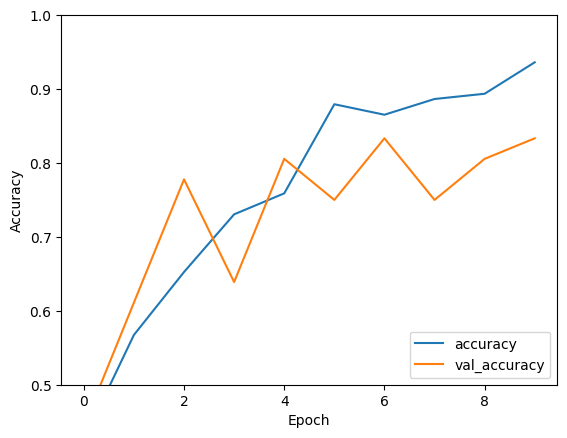

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_test, labels_test, verbose=2)

In [23]:
print(test_acc)

0.8333333134651184
